<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-шагу-1" data-toc-modified-id="Вывод-по-шагу-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по шагу 1</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
insurance_data = pd.read_csv('/datasets/insurance.csv')
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [3]:
insurance_data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
def show_rows(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
    print('Количество пропусков в каждом столбце')    
    print(data_frame.isna().mean())

In [5]:
show_rows(insurance_data)

Уникальные значения столбца Пол
[1 0]
Уникальные значения столбца Возраст
[41. 46. 29. 21. 28. 43. 39. 25. 36. 32. 38. 23. 40. 34. 26. 42. 27. 33.
 47. 30. 19. 31. 22. 20. 24. 18. 37. 48. 45. 44. 52. 49. 35. 56. 65. 55.
 57. 54. 50. 53. 51. 58. 59. 60. 61. 62.]
Уникальные значения столбца Зарплата
[49600. 38000. 21000. 41700. 26100. 41000. 39700. 38600. 49700. 51700.
 36600. 29300. 39500. 55000. 43700. 23300. 48900. 33200. 36900. 43500.
 36100. 26600. 48700. 40400. 38400. 34600. 34800. 36800. 42200. 46300.
 30300. 51000. 28100. 64800. 30400. 45300. 38300. 49500. 19400. 40200.
 31700. 69200. 33100. 31600. 34500. 38700. 39600. 42400. 34900. 30500.
 24200. 49900. 14300. 47000. 44800. 43800. 42700. 35400. 57200. 29600.
 37400. 48100. 33700. 61800. 39400. 15600. 52600. 37600. 52500. 32700.
 51600. 60900. 41800. 47400. 26500. 45900. 35700. 34300. 26700. 25700.
 33300. 31100. 31500. 42100. 37300. 42500. 27300. 46800. 33500. 44300.
 41600. 53900. 40100. 44600. 45000. 32000. 38200. 33000. 38500

Изменим тип данных в столбцах Возраст и Зарплата на целочисленный ввиду отсуствия дробных частей. Так же уменьшим обращение к памяти для остальных столбцов.

In [6]:
insurance_data['Пол'] = pd.to_numeric(insurance_data['Пол'], downcast='integer')
insurance_data['Возраст'] = pd.to_numeric(insurance_data['Возраст'], downcast='integer')
insurance_data['Зарплата'] = pd.to_numeric(insurance_data['Зарплата'], downcast='integer')
insurance_data['Члены семьи'] = pd.to_numeric(insurance_data['Члены семьи'], downcast='integer')
insurance_data['Страховые выплаты'] = pd.to_numeric(insurance_data['Страховые выплаты'], downcast='integer')
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int8   
 1   Возраст            5000 non-null   int8   
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int8   
 4   Страховые выплаты  5000 non-null   int8   
dtypes: float64(1), int8(4)
memory usage: 58.7 KB


Выигрыш в размере дата сета: 195.4 KB - 58.7 KB = 136.7 KB 

### Вывод по шагу 1

Данные загружены и не имеют аномалий. Приведение типов позволит более быстро обращаться к данным.

In [7]:
insurance_data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Text(0, 0.5, 'Количество человек')

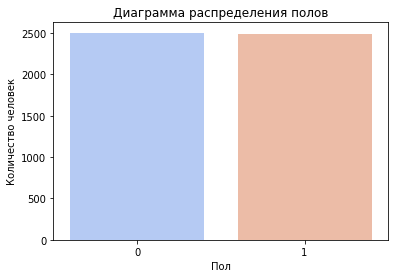

In [79]:
sns.countplot(x='Пол', data=insurance_data, palette='coolwarm');
plt.title('Диаграмма распределения полов')
plt.ylabel('Количество человек')

Text(0.5, 1.0, 'Распределение возрастов')

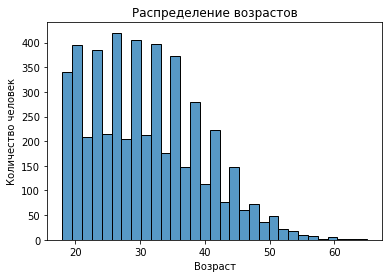

In [80]:
sns.histplot(insurance_data['Возраст'])
plt.ylabel('Количество человек')
plt.title('Распределение возрастов')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Возраст'>

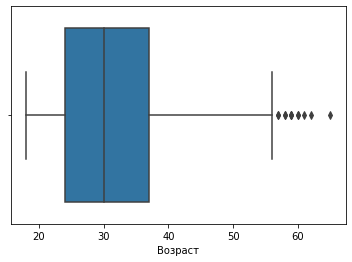

In [26]:
sns.boxplot(insurance_data['Возраст'])

Text(0.5, 1.0, 'Гистограмма зарплат')

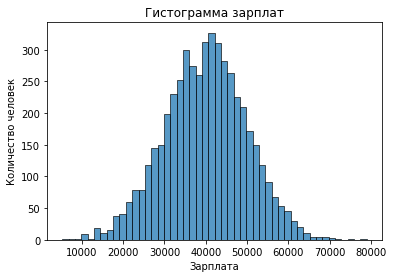

In [81]:
sns.histplot(insurance_data['Зарплата'])
plt.ylabel('Количество человек')
plt.title('Гистограмма зарплат')

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Зарплата'>

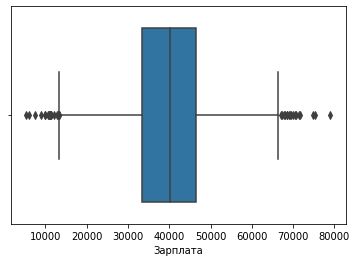

In [31]:
sns.boxplot(insurance_data['Зарплата'])

Text(0.5, 1.0, 'Распределение по количеству членов семьи')

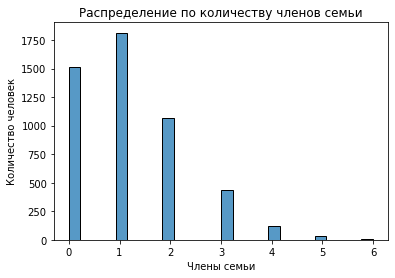

In [93]:
sns.histplot(insurance_data['Члены семьи'])
plt.ylabel('Количество человек')
plt.title('Распределение по количеству членов семьи')

Text(0.5, 1.0, 'Распределение по страховым выплатам')

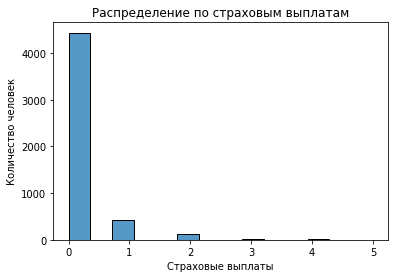

In [95]:
sns.histplot(insurance_data['Страховые выплаты'])
plt.ylabel('Количество человек')
plt.title('Распределение по страховым выплатам')

## Умножение матриц

Убедимся в том, что линейня регрессия из scikit-learn вычисляет значения по формуле.

In [10]:
features = insurance_data.drop('Страховые выплаты',axis=1)
target = insurance_data['Страховые выплаты']

In [11]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = np.linalg.inv(X.T @ X) @ X.T @ y
display(w[1:])
model = LinearRegression()
model.fit(features, target)
model.coef_

array([ 7.92580543e-03,  3.57083050e-02, -1.70080492e-07, -1.35676623e-02])

array([ 7.92580543e-03,  3.57083050e-02, -1.70080492e-07, -1.35676623e-02])

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Коэфициенты регрессии совпадают на 100%. Теперь перейдем к теоретической части.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

**Ответ:** не изменится.<br>
    
**Обоснование:**




$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w'= (P^T (X^T X) P)^{-1} (XP)^T y
$$


$$ w'=  P^{-1}(X^T X)^{-1} (P^T)^{-1}P^T X^T  y$$

$$ w'=  P^{-1}(X^T X)^{-1} E X^T  y $$

$$ w'=  P^{-1}(X^T X)^{-1} E X^T  y $$

$$ w'=  P^{-1}(X^T X)^{-1} X^T  y $$

$$ w'=  P^{-1} w $$



## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу $Y$, которая будет генерироваться случайным образом.

Этапы алгоритма:
1. Составление матрицы $Y$.
2. Проверка матрицы на обратимость. Вычисление детерминанта матрицы $Y$.
3. Получение матрицы преобразованных признаков $Z = XY$.
4. Применение алгоритма на преобразованных признаках $Z$.

**Обоснование**

Матрица $Y$ должна иметь необходимую размерность $(nxn)$, где n - количество признаков для регрессии.
Таким образом матрица $Z$ будет иметь туже размерность, что и матрица $X$. Обратная матрица $Y$ существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

Пример:

$
X = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix}
\qquad 
Y = \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix}
\qquad det  Y = 3 $

Найдем значние Z:

$
Z = \begin{pmatrix}
1 & 2 \\
2 & 3 \\
4 & 5  
\end{pmatrix} \begin{pmatrix}
1 & 0 \\
2 & 3 \\  
\end{pmatrix} = \begin{pmatrix}
1*1+2*2 & 1*0+2*3  \\
2*1+3*2 & 2*0+3*3  \\
4*1+5*2 & 4*0+5*3   
\end{pmatrix} = \begin{pmatrix}
5 & 6 \\
8 & 9 \\
14 & 15  
\end{pmatrix}$

После этого добавляем нулевой столбец и вводим данные в линейную регрессию.

## Проверка алгоритма

Проведем исследование модели по двум направлениям:
1. Исследуем качество модели без преобразования.
         1.1 С исходными признаками
         1.2 С отмасштабированными признаками
2. Исследуем качество модели с преобразованием.
         2.1 С исходными признаками
         2.2 С отмасштабированными признаками

Разделим данные на обучающие и тестовые.

In [12]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=7072020)

In [13]:
model = LinearRegression()
model.fit(features_train, target_train)
R2_LR_origin_data = r2_score(target_test, model.predict(features_test))
print("w-vector coef",model.coef_)
print("R2 =", R2_LR_origin_data)

w-vector coef [ 1.97416051e-03  3.51823837e-02  3.34772368e-08 -1.34952026e-02]
R2 = 0.418410815122086


In [14]:
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
R2_LR_origin_data_scaled = r2_score(target_test, pipeline.predict(features_test))
#print("w-vector coef",pipeline.coef_) при использовании pipeline невозможно получить коэффициенты регрессии
print("R2 =", R2_LR_origin_data_scaled)

R2 = 0.41841081512208866


Модель ведет себя одинаково как на исходных данных, так и на отмасштабированных. Колебания 15 знака и дальше после запятой связано с точностью хранения дробных чисел в python 3.

Создадим функцию преобразования матрицы признаков.

In [15]:
def cipher_features(features):
    crypted_features = features
    n = features.shape[1]
    np.random.seed(7072020)
    cipher_matrix = np.random.randint(1, 10, (n,n))
    det = np.linalg.det(cipher_matrix)
    while det == 0:
        np.random.seed(7072021)
        cipher_matrix = np.random.randint(1, 10, (n,n))
        det = np.linalg.det(cipher_matrix)
    crypted_features = crypted_features @ cipher_matrix
    return crypted_features, cipher_matrix

Выведем данные до преобразования и после.

In [16]:
display(features.head())
features, cipher_matrix = cipher_features(features)
display(features.head())
cipher_matrix

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


,0,1,2,3
0,397184.0,49981.0,99373.0,248097.0
1,304422.0,38421.0,76185.0,190101.0
2,168261.0,21261.0,42116.0,105058.0
3,333805.0,41903.0,83486.0,208560.0
4,209059.0,26357.0,52320.0,130562.0


array([[7, 5, 8, 6],
       [9, 9, 4, 2],
       [8, 1, 2, 5],
       [8, 7, 1, 9]])

Как видно, данные потеряли свои оригинальные значения, теперь в них хранится непонятное число. Разобьем данные на тренировочную и обучающую выборку и проверим R2 значение.

In [17]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=7072020)

In [18]:
model = LinearRegression()
model.fit(features_train, target_train)
R2_LR_cipher_data = r2_score(target_test, model.predict(features_test))
print("w-vector coef",model.coef_)
print("R2 =", R2_LR_cipher_data)

w-vector coef [ 0.00319167  0.00168011  0.00069429 -0.0057204 ]
R2 = 0.41841081512209166


In [19]:
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
pipeline.fit(features_train, target_train)
R2_LR_cipher_data_scaled = r2_score(target_test, pipeline.predict(features_test))
#print("w-vector coef",pipeline.coef_) при использовании pipeline невозможно получить коэффициенты регрессии
print("R2 =", R2_LR_cipher_data_scaled)

R2 = 0.41841081512209466


Сравним показатели качества моделей.

In [20]:
result = pd.DataFrame(data= [R2_LR_origin_data_scaled,
                      R2_LR_origin_data,
                      R2_LR_cipher_data,
                      R2_LR_cipher_data_scaled], 
                     columns=['R2'], 
                     index=['Линейная регрессия',
                            'Линейная регрессия c масштабом',
                            'Линейная регрессия на преобразованных признаках',
                            'Линейная регрессия на преобразованных признаках c масштабом',])
result

,R2
Линейная регрессия,0.418411
Линейная регрессия c масштабом,0.418411
Линейная регрессия на преобразованных признаках,0.418411
Линейная регрессия на преобразованных признаках c масштабом,0.418411


## Итоговый вывод

В ходе работы было проделано:

1. Загружены и изучены данные.
2. Качество линейной регресии не изменилось от использования исодной матрици и исходной матрицы, умноженную на обратимую.
3. Создан алгоритм преобразования данных.
4. Исследован алгоритм преобразования данных и проверена метрика R2 для данных без преобразования и с ним.

По результатам работы использования матричных операций можно увидеть, что данные очень просто зашифровать от распознования, имея правильную матрицу.